## Data cleansing

In [ ]:
# Data treatment
# ==============================================================================
import pandas as pd
import numpy as np

# Graphics
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()

import io
pd.set_option('display.max_columns', None)
df = pd.read_csv(io.BytesIO(uploaded["stroke-data.csv"]))

Saving stroke-data.csv to stroke-data (2).csv


In [ ]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
nans = df.isnull().values.any()
print("\n - Is there a NaN in the dataset:", nans)
print("\n - Tell me if there is a NaN value in the row/column: \n",df.isna())

# Select columns that have a NaN value
df_n = df[df.isna().any(axis=1)]
print("\n - Columns with NaNs:\n", df_n)

# Remove NaN values
df = df.dropna()
nans = df.isnull().values.any()
print("\n - There are some NaN in the dataset: \n", nans)
print("\n - Clean dataset: \n", df)



 - Is there a NaN in the dataset: True

 - Tell me if there is a NaN value in the row/column: 
          id  gender    age  hypertension  heart_disease  ever_married  \
0     False   False  False         False          False         False   
1     False   False  False         False          False         False   
2     False   False  False         False          False         False   
3     False   False  False         False          False         False   
4     False   False  False         False          False         False   
...     ...     ...    ...           ...            ...           ...   
5105  False   False  False         False          False         False   
5106  False   False  False         False          False         False   
5107  False   False  False         False          False         False   
5108  False   False  False         False          False         False   
5109  False   False  False         False          False         False   

      work_type  Residence

## Transformation of *data*

In [ ]:
from sklearn import preprocessing

# The sklearn MinMaxScaler method allows us to apply a scaling in the range specified
scaler = preprocessing.MinMaxScaler(feature_range=(0,1))

# We select columns with numerical values ​​of interest
df_s = df[['age', 'avg_glucose_level', 'bmi']]
print(" => Data NOT rescaled: \n", df_s[0:5])

# We apply the scaling function
df_scaled = pd.DataFrame(scaler.fit_transform(df_s), columns=df_s.columns)
print(" => Rescaled data: \n", df_scaled[0:5])

 => Data NOT rescaled: 
     age  avg_glucose_level   bmi
0  67.0             228.69  36.6
2  80.0             105.92  32.5
3  49.0             171.23  34.4
4  79.0             174.12  24.0
5  81.0             186.21  29.0
 => rescaled data: 
         age  avg_glucose_level       bmi
0  0.816895           0.801265  0.301260
1  0.975586           0.234512  0.254296
2  0.597168           0.536008  0.276060
3  0.963379           0.549349  0.156930
4  0.987793           0.605161  0.214204


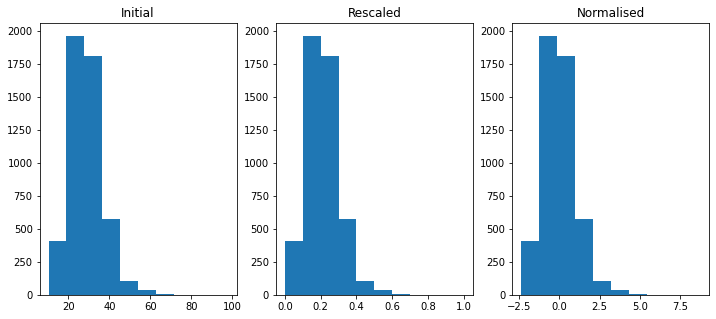

In [ ]:
# Standardization 
df_norm = (df_scaled - df_scaled.mean()) / df_scaled.std()

# Let's see the result
import matplotlib.pyplot as plt
fig = plt.figure(1, figsize=(12, 5))
plt.subplot(131)
plt.hist(df['bmi'].values)
plt.title("Initial")
plt.subplot(132)
plt.hist(df_scaled['bmi'].values)
plt.title("Rescaled")
plt.subplot(133)
plt.hist(df_norm['bmi'].values)
plt.title("Normalised")

plt.show()

## Coding of categorical variables

In [ ]:
# One-hot encoding example with Pandas
df = df[['id', 'age', 'bmi', 'gender']]
cod_gen = pd.get_dummies(df, prefix='gender')
print(cod_gen.head())

      id   age   bmi  gender_Female  gender_Male  gender_Other
0   9046  67.0  36.6              0            1             0
2  31112  80.0  32.5              0            1             0
3  60182  49.0  34.4              1            0             0
4   1665  79.0  24.0              1            0             0
5  56669  81.0  29.0              0            1             0


In [ ]:
# SKLearn Function-Based example
from sklearn.preprocessing import LabelBinarizer
data = LabelBinarizer().fit_transform(df.gender)
print(data)

from sklearn.preprocessing import OneHotEncoder
cod_gen = OneHotEncoder().fit_transform(data).toarray()
print(cod_gen)

[[0 1 0]
 [0 1 0]
 [1 0 0]
 ...
 [1 0 0]
 [0 1 0]
 [1 0 0]]
[[1. 0. 0. 1. 1. 0.]
 [1. 0. 0. 1. 1. 0.]
 [0. 1. 1. 0. 1. 0.]
 ...
 [0. 1. 1. 0. 1. 0.]
 [1. 0. 0. 1. 1. 0.]
 [0. 1. 1. 0. 1. 0.]]
